<a href="https://colab.research.google.com/github/gharabawy14/Data-Mining/blob/main/Predicting_Customer_Churn_In_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

%matplotlib inline
plt.style.use("seaborn")

In [2]:
# Import dataset
df = pd.read_csv('datas.csv')

# Data Cleaning

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Drop unnecessary attributes
df.drop(columns=['RowNumber', 'CustomerId', 'Surname','CreditScore'], axis = 1, inplace = True)

In [5]:
# define unique values for the attribute geography
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
# define unique values for the attribute gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
categorical_columns = ['Gender', 'Geography']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=tempdf,
        right=df,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)

In [9]:
df.drop(columns=['Gender_Female'], axis = 1, inplace = True)

In [10]:
df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,0,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,0,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,0,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,39,5,0.00,2,1,0,96270.64,0
9996,1,0,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,1,0,0,0,36,7,0.00,1,0,1,42085.58,1
9998,0,1,0,1,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.dtypes

Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
dtype: object

## Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
x = df.drop('Exited', axis=1)
y = df['Exited']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Data Modelling

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import accuracy_score

y_prediction_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_prediction_rf)
accuracy_rf

0.8535

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction_rf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1568
           1       0.78      0.45      0.57       432

    accuracy                           0.85      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.85      0.84      2000



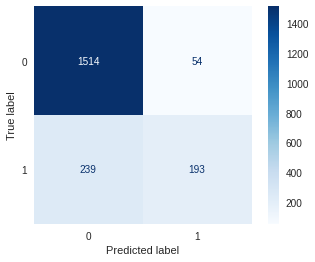

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, cmap = 'Blues')
plt.grid(False)
plt.show()

## XGBoost

In [17]:
from xgboost import XGBClassifier
xgb_model= XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier()

In [18]:
from sklearn.metrics import accuracy_score

y_prediction_xgb = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_prediction_xgb)
accuracy_xgb

0.861

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction_xgb))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1568
           1       0.83      0.44      0.58       432

    accuracy                           0.86      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.86      0.84      2000



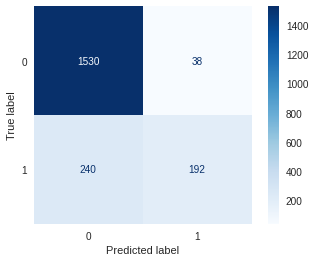

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_model, x_test, y_test, cmap = 'Blues')
plt.grid(False)
plt.show()

## K-Nearest Neighbors

### K-nearest neigbors with hyperparameter tuning

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [22]:
g_res.best_score_

0.796375228040231

In [23]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [24]:
knn_model = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform',metric = 'manhattan')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [25]:
from sklearn.metrics import accuracy_score

y_prediction_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_prediction_knn)
accuracy_knn

0.779

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction_knn))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88      1568
           1       0.27      0.01      0.03       432

    accuracy                           0.78      2000
   macro avg       0.53      0.50      0.45      2000
weighted avg       0.67      0.78      0.69      2000



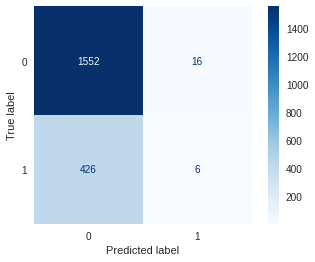

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_model, x_test, y_test, cmap = 'Blues')
plt.grid(False)
plt.show()

# Evaluation Metrics

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
metrics= ["Accuracy","Sensitivity","Specificity","Error Rate"]
xgb_metrics=[accuracy_xgb,precision_score(y_test,y_prediction_xgb),recall_score(y_test,y_prediction_xgb), 1 - accuracy_xgb]
rf_metrics=[accuracy_rf,precision_score(y_test,y_prediction_rf),recall_score(y_test,y_prediction_rf), 1 - accuracy_rf]
knn_metrics=[accuracy_knn,precision_score(y_test,y_prediction_knn),recall_score(y_test,y_prediction_knn), 1 - accuracy_knn]

models_metrics = pd.DataFrame({"Performance Metrics":metrics,"XGBoost":xgb_metrics,"Random Forest":rf_metrics,"K-Nearest Neighbor":knn_metrics})
models_metrics.round(2)

,Performance Metrics,XGBoost,Random Forest,K-Nearest Neighbor
0,Accuracy,0.86,0.85,0.78
1,Sensitivity,0.83,0.78,0.27
2,Specificity,0.44,0.45,0.01
3,Error Rate,0.14,0.15,0.22
